The file 'diabetes.csv' could not be found. Please ensure it's uploaded.


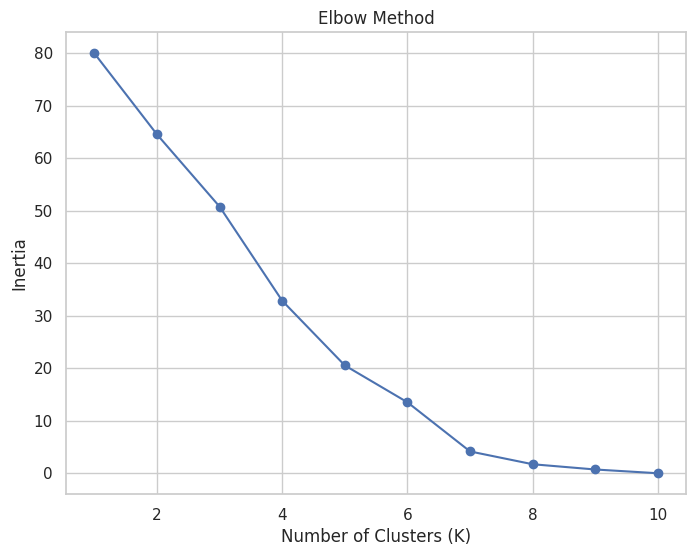

Silhouette Score: 0.13368302316736747
Cluster Centers:
 [[-0.5718328  -0.92849416  0.17256648  0.06449533 -0.27168409 -0.57381174
  -0.42873455 -0.79008953]
 [ 1.08347268  0.70228879  0.82996257 -1.16677921 -0.55391299 -0.60636184
  -0.08992065  0.63029614]
 [ 0.03009646  0.57734977 -0.58754776  0.51889427  0.54864058  0.87699267
   0.47369487  0.47494146]]


In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set up for plotting in Colab
%matplotlib inline
sns.set(style="whitegrid")

# Upload the diabetes dataset file if not already in Colab
from google.colab import files
import os

if not os.path.isfile('/content/diabetes_dataset.xlsx'):
    print("Please upload the diabetes_dataset.xlsx file.") #Fixed filename here
    uploaded = files.upload()

# Load the dataset, Change this to read the excel file
try:
   df = pd.read_csv("diabetes.csv")
except FileNotFoundError:
   print("The file 'diabetes.csv' could not be found. Please ensure it's uploaded.")

#The original code tried to read a csv file but the filename suggests that it's an excel file.
# Changed the following line to read an excel file instead.
df = pd.read_excel("diabetes_dataset.xlsx") #Fixed filename here

# Preprocess the data
try:
    features = df.drop(columns=['Outcome'])
except KeyError:
    print("Outcome column not found in the dataset. Please check the dataset structure.")

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine optimal K using the Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Fit the K-means model with the optimal K
optimal_k = 3  # Assume 3 is optimal from elbow/silhouette analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
df['Cluster'] = clusters

# Evaluate the clustering using silhouette score
score = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {score}')

# Analyze cluster characteristics
cluster_centers = kmeans.cluster_centers_
print(f'Cluster Centers:\n {cluster_centers}')

# New section

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


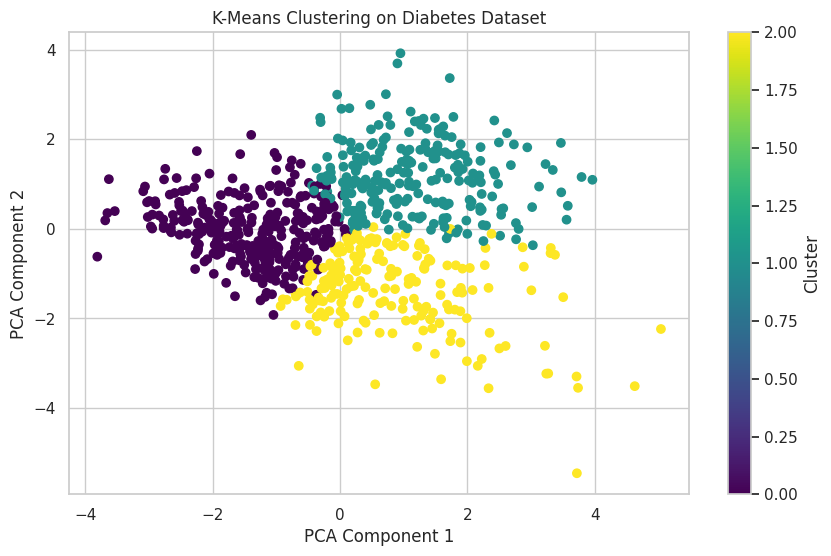

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the diabetes dataset
# You can download the dataset from: https://www.kaggle.com/uciml/pima-indians-diabetes-database
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes_data = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the dataset
print(diabetes_data.head())

# Preprocessing: Handling missing values (if any)
# Replace zeros in certain columns with NaN and then fill them with the mean
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose',
                                                                                                     'BloodPressure',
                                                                                                     'SkinThickness',
                                                                                                     'Insulin',
                                                                                                     'BMI']].replace(0, np.nan)

diabetes_data.fillna(diabetes_data.mean(), inplace=True)

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(diabetes_data.iloc[:, :-1])  # Exclude the target variable

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Choose the number of clusters
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original data
diabetes_data['Cluster'] = clusters

# Visualizing the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=reduced_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering on Diabetes Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()